# Ode to Palmyra 

This is the famous Palmyra record by Cobb (2003), updated in 2013 and available here:
https://www.ncdc.noaa.gov/cdo/f?p=519:1:::::P1_STUDY_ID:1875

In [54]:
%load_ext autoreload
%autoreload 2
import pyleoclim as pyleo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path = '/Users/julieneg/Documents/Science/Python/pyleoclim_affairs/palmyra/palmyra2013.txt'
df = pd.read_csv(path,skiprows=118, sep='\t')
df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,d18O
0,928.125,-4.651
1,928.209,-4.631
2,928.292,-4.629
3,928.375,-4.562
4,928.459,-4.580


Load it into a Pyleoclim Series, and flip so up means "warmer/fresher", indicative of El Niño conditions

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot: xlabel='time [year CE]', ylabel='$\\delta^{18}$O x (-1) [‰]'>)

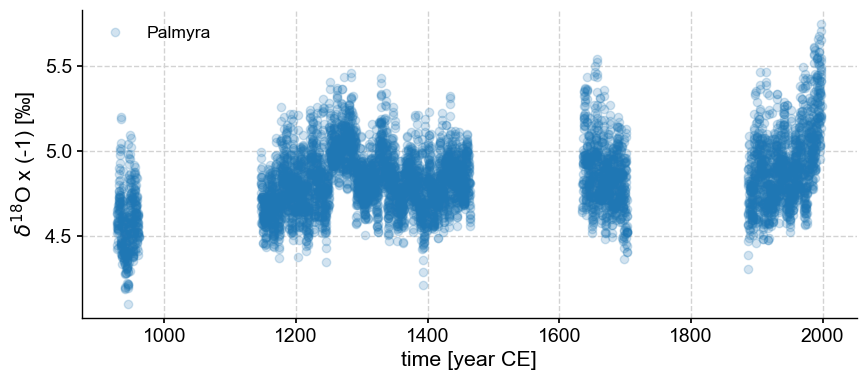

In [64]:
pal = pyleo.Series(time=df['age'], time_name='time', time_unit='year CE',
                   value=df['d18O'], value_name='$\delta^{18}$O', value_unit=u'‰',
                   label='Palmyra').flip()    
pal.plot(marker='o',alpha=0.2, linewidth =0)

We see that there are 4 segments ; let's isolate and plot them one by one

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


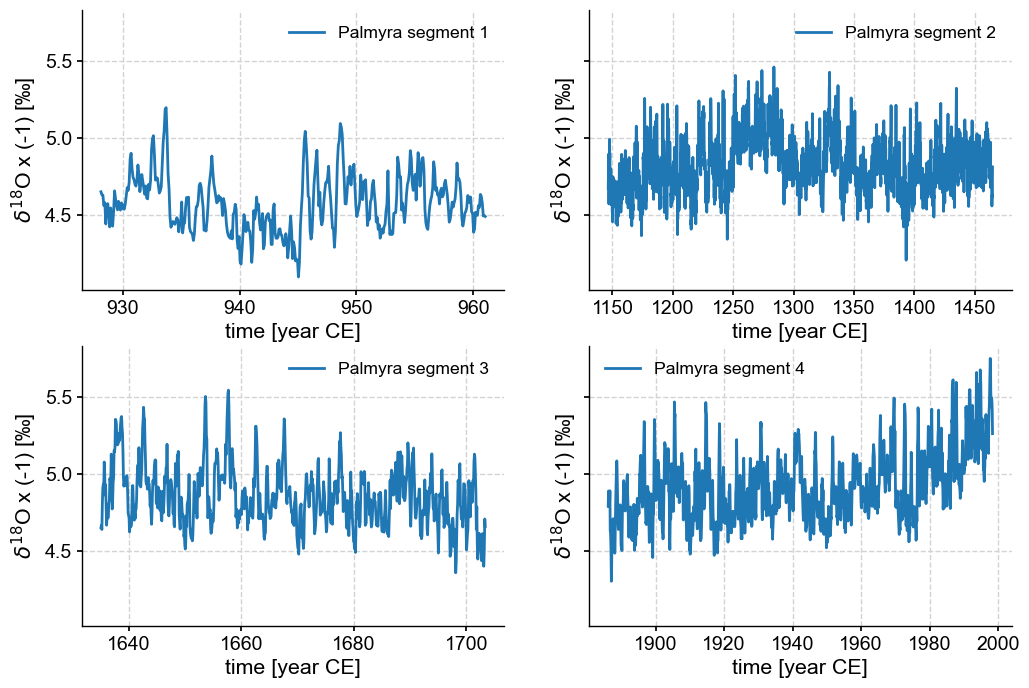

In [66]:
pals = pal.segment()
nseg = len(pals.series_list)
fig, ax = plt.subplots(2,2, sharey=True, figsize = (12,8))
ax = ax.flatten()
for i, ts, in enumerate(pals.series_list):
    ts.plot(ax=ax[i])

It is well-known that the 20th century warming signal has been accompanied by large-scale freshening, which induced a trend towards lighter (more negative) d18O. Let us filter the series in the [2,8y] band instead. The data are no exactly evenly spaced, so we interpolate at monthly resolution first:

Text(0.5, 0.98, 'Palmyra $\\delta^{18}$O record')

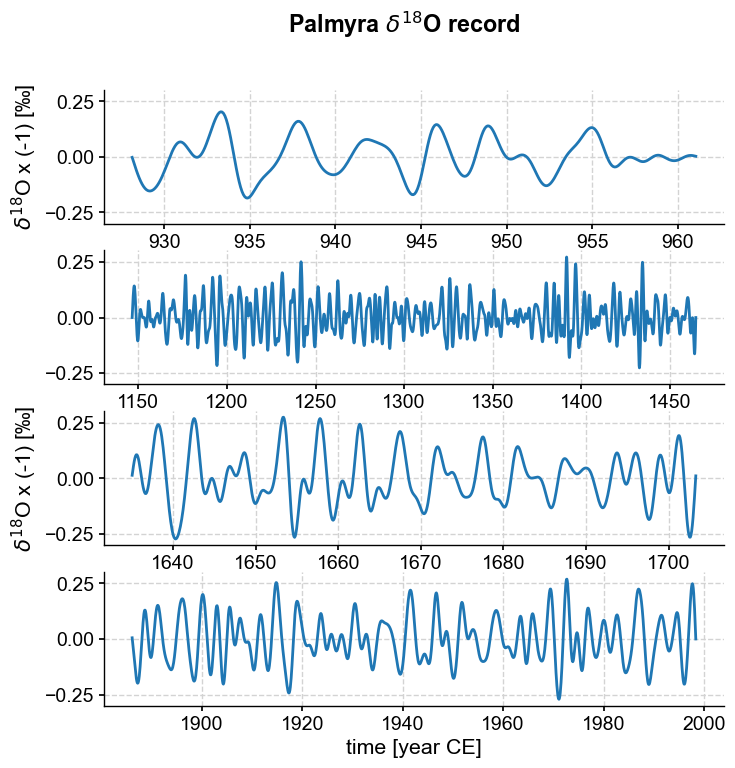

In [85]:
pals28 = pals.copy()  
fig, ax = plt.subplots(4,1, figsize = (8,8),sharey=True)
ax = ax.flatten()
for i, ts, in enumerate(pals.series_list):
    ts28 = ts.interp(step=1/12).filter(cutoff_scale=[2,8]).center()
    ts28.plot(ax=ax[i],label='')
    pals28.series_list[i] = ts28
ax[0].set_xlabel(''); ax[1].set_xlabel('');
ax[1].set_ylabel(''); ax[3].set_ylabel(''); 
fig.suptitle('Palmyra $\delta^{18}$O record', fontweight = 'bold')

In [86]:
labels = [ts.label for ts in pals28.series_list]
print(labels)

['Palmyra segment 1', 'Palmyra segment 2', 'Palmyra segment 3', 'Palmyra segment 4']


The second piece is nearly 3 centuries long, which makes it hard to compare to the other, much shorter segments:

The two series have different lengths, left: 396 vs right: 1188
Metadata are different:
label property -- left: Palmyra segment 1, right: Palmyra 1150-1249
The two series have different lengths, left: 820 vs right: 1188
Metadata are different:
label property -- left: Palmyra segment 3, right: Palmyra 1150-1249
The two series have different lengths, left: 1348 vs right: 1188
Metadata are different:
label property -- left: Palmyra segment 4, right: Palmyra 1150-1249
The two series have different lengths, left: 396 vs right: 1188
Metadata are different:
label property -- left: Palmyra segment 1, right: Palmyra 1250-1349
The two series have different lengths, left: 820 vs right: 1188
Metadata are different:
label property -- left: Palmyra segment 3, right: Palmyra 1250-1349
The two series have different lengths, left: 1348 vs right: 1188
Metadata are different:
label property -- left: Palmyra segment 4, right: Palmyra 1250-1349
The two series have values differing by more than 1e-05 ‰
Meta

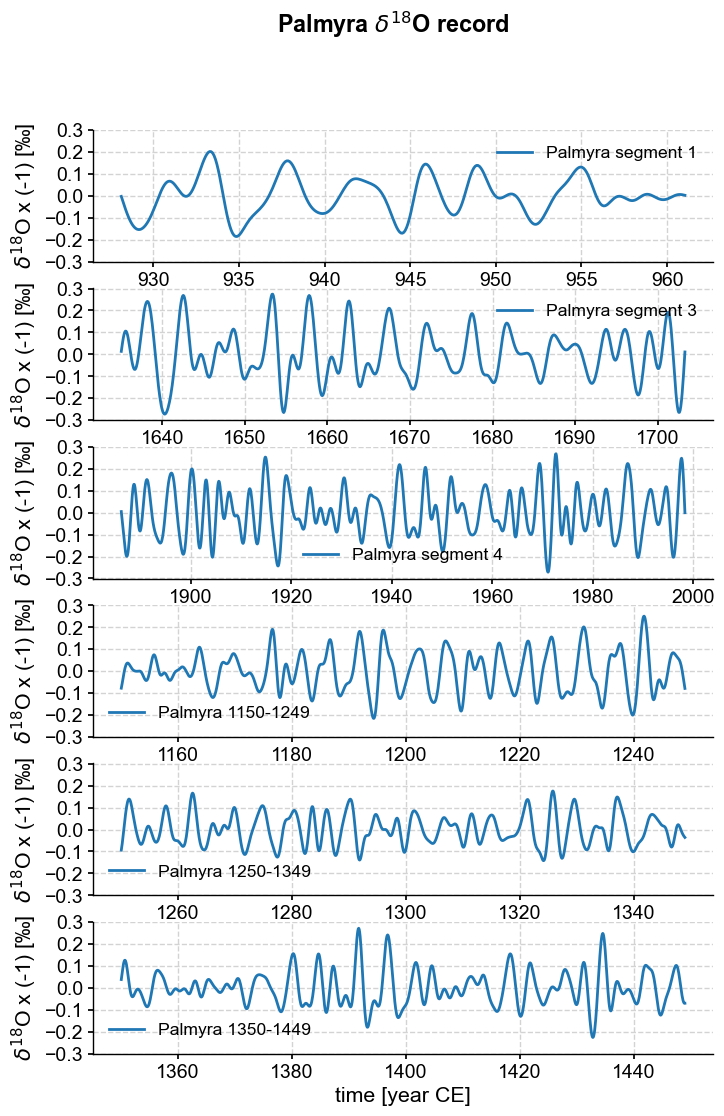

In [87]:
ts12 = pals28.series_list[1].sel(time=slice(1150,1249))
ts12.label = 'Palmyra 1150-1249'
ts13 = pals28.series_list[1].sel(time=slice(1250,1349))
ts13.label = 'Palmyra 1250-1349'
ts14 = pals28.series_list[1].sel(time=slice(1350,1449))
ts14.label = 'Palmyra 1350-1449'

# remove the second piece
pals28.remove('Palmyra segment 2')
ms_plot = pals28 + ts12 + ts13 + ts14

#ms_plot = pyleo.MultipleSeries([pals28.series_list[0], ts12, ts13, ts14,
                                #pals28.series_list[2], pals28.series_list[3]])

fig, ax = plt.subplots(6,1, figsize = (8,12),sharey=True)

ax = ax.flatten()
for i, ts, in enumerate(ms_plot.series_list):
    ts.plot(ax=ax[i])
    ax[i].set_yticks(np.arange(-.3, .35, step=.1))
fig.suptitle('Palmyra $\delta^{18}$O record', fontweight = 'bold')
fig.savefig('./palmyra_segments_2-8bandpass.pdf',dpi=300)

## Monthly resampling



In [88]:
ts.resample('1MS').mean().filter(cutoff_scale=[2,8])

ValueError: Invalid unit provided, got: MS

Would it be hard to also accept the usual pandas [periods frequency strings](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) as well, given that they do not conflict with the paleo ones?